In [18]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [19]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [20]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [21]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
columns = ["price_change_percentage_24h", "price_change_percentage_7d",\
            "price_change_percentage_14d","price_change_percentage_30d",\
            "price_change_percentage_60d","price_change_percentage_200d",\
            "price_change_percentage_1y"]
scaled_data = StandardScaler().fit_transform(market_data_df[columns])

In [22]:
# Create a DataFrame with the scaled data
market_crypto_scaled_df = pd.DataFrame(scaled_data,columns=columns)

# Copy the crypto names from the original data

market_crypto_scaled_df['coin_id'] = market_data_df.index
# Set the coinid column as index

market_crypto_scaled_df = market_crypto_scaled_df.set_index('coin_id')

# Display sample data

market_crypto_scaled_df.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [23]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(market_crypto_scaled_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)


# Display the DataFrame
df_elbow

c:\Users\Warre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Warre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Warre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Warre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

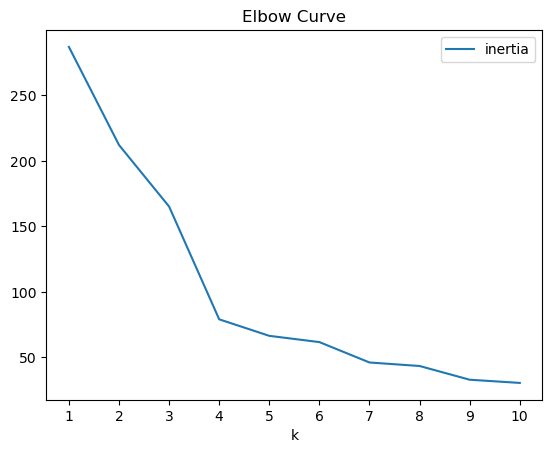

In [37]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import plotly.express as px
elbow_plot = df_elbow.plot.line(
    x="k",
    y="inertia", 
    title="Elbow Curve",
    xticks=k)
elbow_plot


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4 is the best value as the trend flattening out at that point

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [25]:
# Initialize the K-Means model using the best value for k
k_best_value =4
kmeans = KMeans(n_clusters= k_best_value, random_state=1)

In [26]:
# Fit the K-Means model using the scaled data
kmeans.fit(market_crypto_scaled_df)

c:\Users\Warre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=5, random_state=1)

In [27]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans.predict(market_crypto_scaled_df)


# View the resulting array of cluster values.
predicted_clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0])

In [28]:
# Create a copy of the DataFrame
clustered_df = market_crypto_scaled_df.copy()

In [29]:
# Add a new column to the DataFrame with the predicted clusters
market_crypto_scaled_df['crypto_cluster'] = predicted_clusters


# Display sample data
market_crypto_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [30]:
# Create the scatter plot using Plotly by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

import plotly.express as px

# Create the scatter plot using Plotly
fig = px.scatter(
    market_crypto_scaled_df,
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    color='price_change_percentage_24h',
    color_continuous_scale='Rainbow',
    title='Scatter Plot of Price Changes'
)

# Show the plot
fig.show()

### Optimize Clusters with Principal Component Analysis.

In [31]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [32]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_transformed_data = pca.fit_transform(market_crypto_scaled_df)


# View the first five rows of the DataFrame. 
pca_transformed_data[0:5]

array([[ 0.41218488, -1.14142472, -0.92519884],
       [ 0.4829275 , -0.75839115, -1.36178145],
       [-0.86101955,  0.06232097,  0.6895573 ],
       [-0.88388881,  0.08721214,  0.53630477],
       [ 0.58999384, -2.5193194 , -1.90265501]])

In [33]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio[0:3]

array([0.36208092, 0.30121457, 0.19810929])

In [34]:
total_explained_variance = explained_variance_ratio.sum()
print(total_explained_variance)


0.8614047764539097


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:**  0.8788327449101367

In [35]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you


# Creating a DataFrame with the PCA data
market_data_pca_df=pd.DataFrame(
    pca_transformed_data,
    columns=["PCA1","PCA2","PCA3"]
)

# Copy the crypto names from the original data
market_data_pca_df["coin_id"]=market_data_pca_df.index

# Set the coinid column as index
market_data_pca_df=market_data_pca_df.set_index('coin_id')

# Display sample data
market_data_pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
0,0.412185,-1.141425,-0.925199
1,0.482928,-0.758391,-1.361781
2,-0.861020,0.062321,0.689557
3,-0.883889,0.087212,0.536305
4,0.589994,-2.519319,-1.902655
5,0.719637,-1.610539,-1.032060
6,0.824205,-0.895121,-2.830033
7,0.754330,-0.977722,-1.675000
8,0.261116,-0.800940,-1.156045


### Find the Best Value for k Using the PCA Data

In [36]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(market_data_pca_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    "k": k,
    "inertia": inertia
}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
df_elbow_pca

c:\Users\Warre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Warre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Warre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Warre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

,k,inertia
0,1,289.453015
1,2,209.310638
2,3,113.525815
3,4,56.239628
4,5,33.523269
5,6,23.196056
6,7,18.587017
7,8,18.382484
8,9,13.856635
9,10,10.386228


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

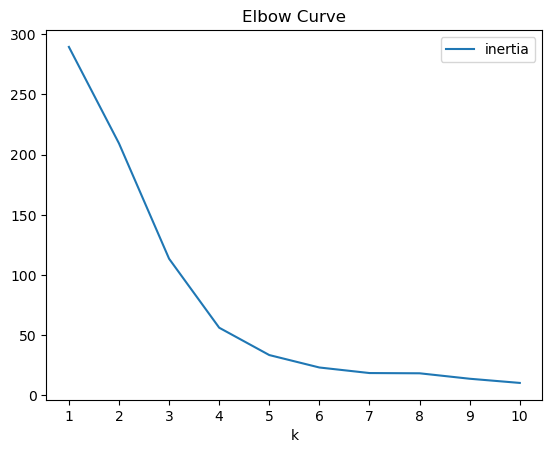

In [38]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

elbow_plot_pca = df_elbow_pca.plot.line(
    x="k",
    y="inertia", 
    title="Elbow Curve",
    xticks=k)
elbow_plot_pca

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No difference, both 4

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [41]:
# Initialize the K-Means model using the best value for k
k_best_value_pca =4
kmeans_pca = KMeans(n_clusters= k_best_value_pca, random_state=1)

In [42]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(market_data_pca_df)

c:\Users\Warre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=4, random_state=1)

In [43]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters_pca = kmeans_pca.predict(market_data_pca_df)

# Print the resulting array of cluster values.
predicted_clusters_pca

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0])

In [44]:
# Create a copy of the DataFrame with the PCA data
clustered_pca_df = market_data_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_data_pca_df['crypto_cluster'] = predicted_clusters

# Display sample data
market_data_pca_df.head()

,PCA1,PCA2,PCA3,crypto_cluster
coin_id,,,,
0,0.412185,-1.141425,-0.925199,2
1,0.482928,-0.758391,-1.361781,2
2,-0.861020,0.062321,0.689557,0
3,-0.883889,0.087212,0.536305,0
4,0.589994,-2.519319,-1.902655,2


In [48]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import plotly.express as px

# Create the scatter plot using Plotly
fig = px.scatter(
    market_data_pca_df,
    x='PCA1',
    y='PCA2',
    color='crypto_cluster',
    color_continuous_scale='Rainbow',
    title='Scatter Plot of Price Changes'
)

# Show the plot
fig.show()

### Determine the Weights of Each Feature on each Principal Component

In [50]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=market_crypto_scaled_df.columns)
pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.265401,-0.487756,0.146222
price_change_percentage_7d,0.125444,-0.284498,-0.598008
price_change_percentage_14d,0.233091,-0.505324,-0.149432
price_change_percentage_30d,0.316049,-0.414630,0.335640
price_change_percentage_60d,0.348962,-0.236343,0.485125
price_change_percentage_200d,0.499912,0.228147,0.165498
price_change_percentage_1y,0.436225,0.371978,0.001412
crypto_cluster,0.444554,-0.087226,-0.472528


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
For PCA1: "price_change_percentage_200d", "price_change_percentage_1y", and "price_change_percentage_60d" have the strongest positive influence.
For PCA2: "price_change_percentage_30d", "price_change_percentage_14d", and "price_change_percentage_60d" have the strongest positive influence.
For PCA3: "price_change_percentage_7d" and "price_change_percentage_14d" have the strongest positive influence.
    